In [1]:
%matplotlib inline

import dwarf as dw
import yt 
import cgs as cgs
import numpy as np
import matplotlib.pyplot as plt
from initial_conditions import ic_list as icl
from initial_conditions import profiles as prof

using cgs py
Loading IC for  Leo_T_burkert
Loading IC for  Leo_T
MUST SET A 'potential_type'
Loading IC for  Sextans_test
MUST SET A 'potential_type'
Loading IC for  Leo_T_obs
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  CarinaMidMed
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  Leo_T_solve_burkert
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
Loading IC for  Leo_test
MUST SET A 'potential_type'
Loaded IC's for  7  dwarf galaxies


In [2]:
def deriv(x,y):
    #dx = x[1:] - x[:-1]
    #return np.gradient(y[:-1], dx)
    return np.diff(y)/np.diff(x)

In [3]:
CarinaMidMed = icl.ic_object_dict['CarinaMidMed']
cmm = icl.known_initial_conditions['CarinaMidMed']
cmm

{'M_DM': 7.3596700000000005e+40,
 'T_dwarf': 10000.0,
 'T_halo': 1800000.0,
 'b': 2.4531136761000005e+21,
 'mu_dwarf': 1.297,
 'mu_halo': 0.62,
 'n_halo': 0.00017,
 'n_o': 0.544,
 'potential_type': 'NFW',
 'r_DM': 2.6845394946e+21}

In [4]:
print CarinaMidMed.ic['M_DM'] / cgs.Msun / 1.0E7
print CarinaMidMed.ic['r_DM'] / cgs.pc
print CarinaMidMed.ic['n_o']  
print CarinaMidMed.ic['RM']/cgs.pc

3.7
870.0
0.544
423.12007563


In [5]:
cmm['n_o'] = 0.4*1.36
cmm['T_halo'] = 1.8E6
cmm['mu_dwarf']=1.297
cmm['mu_halo'] =0.62
new_carina = icl.dwarf_ic('CarinaMidMed')
new_carina.set_ic(cmm)
new_carina.FLASH_readable_ic()

If M200 or n_o are not set, they will be solved for
using the profile choice
sim_rho_crit       = 9.74000000E-30
sim_TCloud         = 1.00000000E+04
sim_rhoCenter      = 1.18014715E-24
sim_mu_halo        = 6.20000000E-01
sim_TAmbient       = 1.80000000E+06
sim_M200           = 6.74000418E+41
sim_bparam         = 2.45311368E+21
sim_rhoAmbient     = 1.76294148E-28
sim_mu_dwarf       = 1.29700000E+00


In [6]:
r = np.linspace(0.0,new_carina.ic['RM'],1000)
new_carina.find_density_profile(r)
M = prof.cumulative_mass(r,new_carina.rho)
print np.max(M) / cgs.Msun
print 20**3/32

658685.173324
250


In [7]:
fpath = '/home/emerick/Research/dwarfs/flash_runs/carina_final/'
#sim = dw.simulation("dwarf_fullp_hdf5", "flash.par", ds_dir = fpath + "lowres/", exact_times = True);

In [8]:
#sne_file = "lowres/mass_evol_0-194.dat"
sne_file   = "lowres/carina_sne_0-380Myr_dt10.dat"
nosne_file = "lowres_nosne/carina_nosne_bound_mass_0-750Myr_dt10.dat"

mass_sne = np.genfromtxt(fpath + sne_file,names=True)
mass_nosne = np.genfromtxt(fpath + nosne_file,names=True)
mass_adiabatic = np.genfromtxt(fpath + "../carina_adiabatic/mass_evolution_0-300.dat",names=True)

mdot_sne = deriv(mass_sne['t'],mass_sne['m']) # solar masses per Myr
mdot_nosne = deriv(mass_nosne['t'],mass_nosne['m'])
mdot_adiabatic = deriv(mass_adiabatic['t'],mass_adiabatic['m'])

#mass_cont  = np.genfromtxt(fpath + "contained_mass_r0_0-91.dat",names=True)
#rad_slice  = np.genfromtxt(fpath + "density_slice_radius.dat",names=True)
#mass_cont['m'] = mass_cont['m'] / cgs.Msun

In [9]:
#r0 = sim.radius.convert_to_units('pc').value

In [10]:
#SN_times = (sim.SN.data['time'] * yt.units.s).convert_to_units('Myr')
#SB_times = (sim.SB.data['time'] * yt.units.s).convert_to_units('Myr')
#print SN_times
#print SB_times

In [11]:
cdata = np.genfromtxt('CarMedMidMass.dat',names=True)
mass_carina = cdata['M'] * 1.0E4
time_carina = cdata['t'] * 10.0
mdot_carina = deriv(time_carina,mass_carina)

In [12]:
print " ratio of initial masses"
#print mass_carina[0] / (1.31*mass_bound['m'][0] / 0.6)
#print mass_carina[0]/1.0E5, mass_bound['m'][0]/1.0E5


 ratio of initial masses


In [13]:
    #dt_bound = dt_bound / 1.0E6; dt_cont=dt_cont/1.0E6; dt_car=dt_car/1.0E6
print mass_carina[52]

132.50007


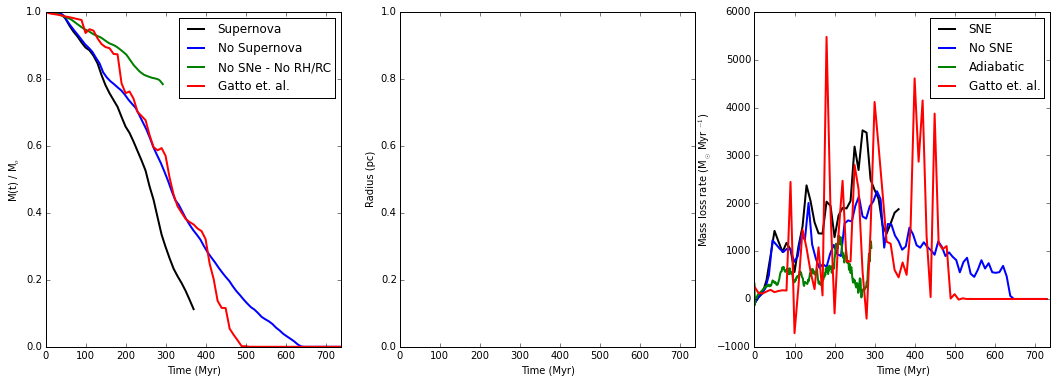

In [18]:
fig = plt.figure(figsize=[18,6])
ax1 = fig.add_subplot(1,3,1)



ax1.plot(mass_sne['t'], mass_sne['m']/mass_sne['m'][0], lw = 2, color = 'black', label = "Supernova")
ax1.plot(mass_nosne['t'] , mass_nosne['m']/mass_nosne['m'][0], lw=2, color ='blue', ls='-', label=r"No Supernova")
ax1.plot(mass_adiabatic['t'] , mass_adiabatic['m']/mass_adiabatic['m'][0], lw=2, color ='green', ls='-', label=r"No SNe - No RH/RC")
ax1.plot(time_carina,mass_carina/mass_carina[0], lw=2, color='red',label='Gatto et. al.')
#ax1.set_ylabel(r'M (10$^5$ M$_{\odot}$)')
ax1.set_ylabel(r'M(t) / M$_{o}$')
ax1.set_xlabel(r'Time (Myr)'); ax1.set_ylim(0,1)


ax2 = fig.add_subplot(1,3,2)
#ax2.plot(rad_slice['t'], rad_slice['r'], lw = 2, color ='black', label = 'Slice averaged')
ax2.set_ylabel(r'Radius (pc)'); ax2.set_xlabel(r'Time (Myr)')
#ax2.plot(ax2.get_xlim(),[r0,r0],lw=2,color='red',ls='--',label='Initial radius')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(mass_sne['t'][0:-1], -mdot_sne, lw=2, color='black', label = "SNE")
ax3.plot(mass_nosne['t'][0:-1],  -mdot_nosne, lw=2, color='blue', ls='-', label = r"No SNE")
ax3.plot(mass_adiabatic['t'][0:-1], -mdot_adiabatic, lw=2, color='green',ls='-', label = r'Adiabatic')
ax3.plot(time_carina[0:-1],- mdot_carina, color = 'red', label="Gatto et. al.", lw=2)
ax3.set_ylabel(r'Mass loss rate (M$_{\odot}$ Myr $^{-1}$)'); ax3.set_xlabel(r'Time (Myr)')
#ax3.set_ylim(0.00,0.1)


#for sntime in SN_times[0:-1]:
#    sntime = sntime.value
#    ax1.plot([sntime,sntime],ax1.get_ylim(),lw=1.5,color='blue',ls='--')
#    ax2.plot([sntime,sntime],ax2.get_ylim(),lw=1.5,color='blue',ls='--')

#ax1.plot([SN_times[-1],SN_times[-1]],ax1.get_ylim(),lw=1.5,color='blue',ls='--',label = "Supernova")
#ax2.plot([SN_times[-1],SN_times[-1]],ax2.get_ylim(),lw=1.5,color='blue',ls='--',label = "Supernova")

for ax in [ax1,ax2,ax3]:
    ax.set_xlim(0.0,np.max( np.array([np.max(mass_sne['t']), np.max(mass_nosne['t']), np.max(mass_adiabatic['t'])])))
    ax.legend(loc='best')
fig.savefig(fpath + "plots/mass_radius_evolution.png")


NameError: name 'dt_car' is not defined

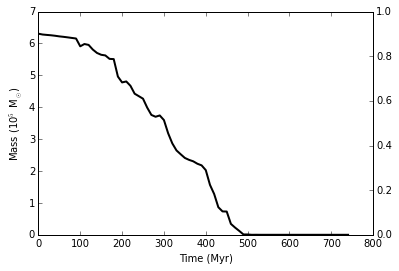

In [15]:
fig, ax1 = plt.subplots()

ax1.plot(time_carina, mass_carina/1.0E5, lw=2, color='black', label='Mass - Gatto et. al.')
ax1.set_xlabel(r'Time (Myr)'); ax1.set_ylabel(r'Mass (10$^{5}$ M$_{\odot}$)')
# Make the y-axis label and tick labels match the line color.
#ax1.set_ylabel('exp', color='b')
#for tl in ax1.get_yticklabels():
#    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(time_carina[0:-1] + dt_car,Mdot_car,color='red', ls='--',label = "Mass loss rate",lw=2)
ax2.set_ylabel('Mass Loss Rate')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.legend(loc='best')
ax2.legend(loc=4)
plt.savefig(fpath + "plots/carina_evolution.png")

In [ ]:
print sim.SN.data['radius']
sim.SN.data['radius'] = np.array(sim.SN.data['radius'] * yt.units.cm )
print sim.SN.data['radius']

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
posx,posy,posz = sim.SN._recenter_pos()
posx,posy,posz = posx/cgs.pc,posy/cgs.pc,posz/cgs.pc
ax.scatter(posx,posy,posz)
ax.set_xlim(-300,300);ax.set_ylim(-300,300), ax.set_zlim(-300,300)